# Feature Selection

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Import Cleaned Dataset
df = pd.read_csv('../Datasets/career_avgs.csv')
df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama


5.014745321394485
2.6926246830223532
0.12755977403084376
0.17184101852910014
0.5554011755585139
32.59644688520236
0.007489180222178139
0.008648295183996688
0.011713417063137754


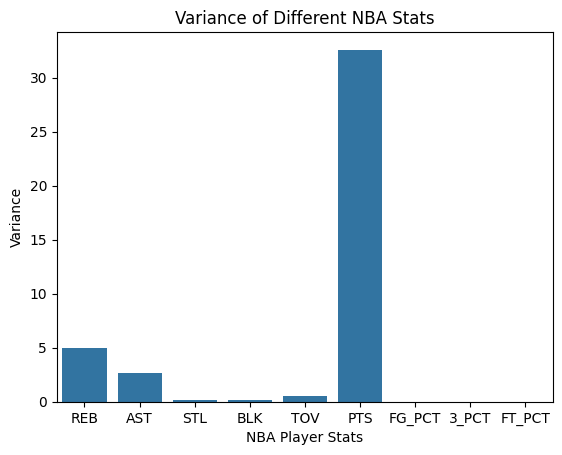

In [49]:
# Feature Selection using Variance Threshold
numeric_data = df.loc[:, "REB": "FT_PCT"]
variance_array = np.empty(numeric_data.shape[1])

for i in range(numeric_data.shape[1]):
    variance_array[i] = np.var(numeric_data.iloc[:, i])
    print(variance_array[i])

sns.barplot(x= numeric_data.columns, y= variance_array)
plt.xlabel('NBA Player Stats')
plt.ylabel('Variance')
plt.title('Variance of Different NBA Stats')
plt.show()

In [5]:
# Scaling the Features using standardization

scaler = StandardScaler().fit(df.loc[:, "REB": "FT_PCT"])
np_standardized = scaler.fit_transform(df.loc[:, "REB": "FT_PCT"])
np_standardized_df = pd.DataFrame(data= np_standardized, columns= df.loc[:, "REB": "FT_PCT"].columns).fillna(0)
np_standardized_df.head()


,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
0,0.950324,-0.602345,-0.143686,0.669008,-0.143380,-0.236932,0.365784,-0.198159,-1.327828
1,1.932746,-0.297638,0.416295,1.151474,0.393351,-0.026750,1.498207,-2.757403,-2.002327
2,2.334646,0.982130,1.256266,1.151474,1.466813,1.199313,0.908885,0.016903,0.058128
3,-0.389343,-0.480462,-0.143686,0.186542,-0.411745,-0.306993,-0.188873,0.221213,-0.357659
4,0.727046,-0.053873,-0.143686,0.427775,-0.277563,0.148402,0.019123,0.307238,-0.625611


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

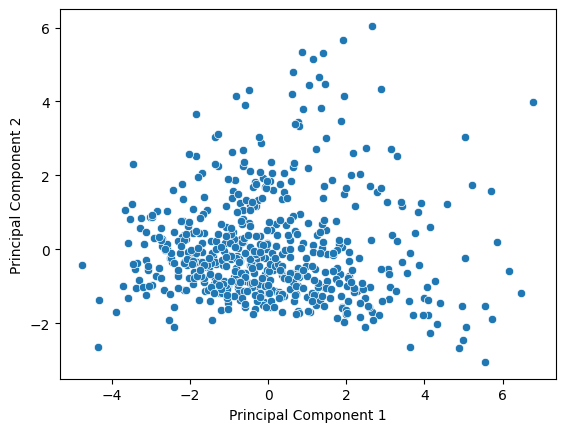

In [6]:
pca = PCA(n_components=2)

principal_components = pca.fit_transform(np_standardized_df)

principal_df = pd.DataFrame(data= principal_components, columns= ['Principal Component 1', 'Principal Component 2'])

principal_df

sns.scatterplot(x= 'Principal Component 1', y= 'Principal Component 2', data = principal_df)

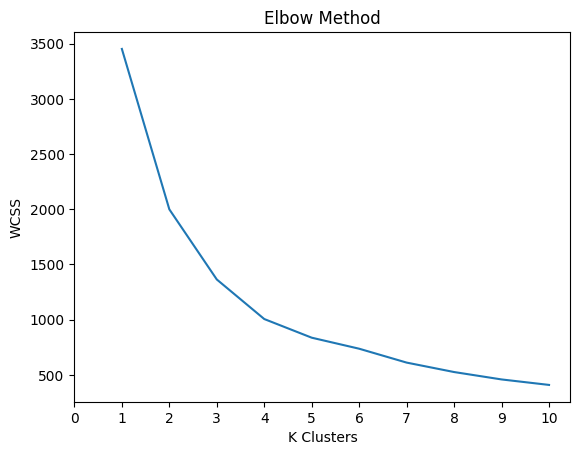

In [18]:
# Performing the Elbow Method to determine the best number of clusters

WCSS = []
for i in range(1,11):
    kmeans= KMeans(n_clusters= i)
    kmeans.fit_transform(principal_df)
    WCSS.append(kmeans.inertia_)

WCSS
plt.plot(range(1,11), WCSS)
plt.xticks(np.arange(0,11,1))
plt.ylabel('WCSS')
plt.xlabel('K Clusters')
plt.title('Elbow Method')
plt.show()


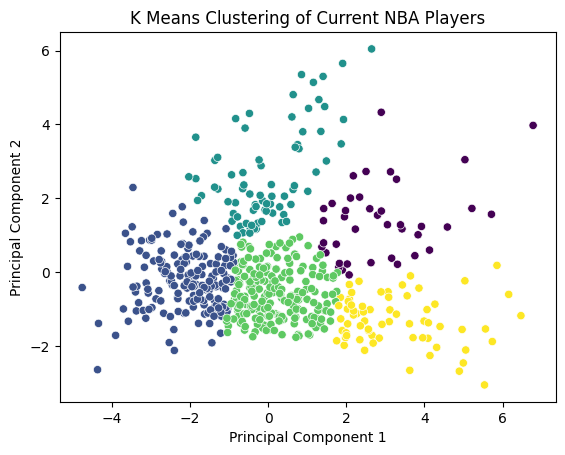

In [ ]:
# K Means Clustering

kmeans = KMeans(n_clusters = 5)
kmeans.fit_transform(principal_df)

In [139]:
clustered_df = df.copy()
clustered_df['Clusters'] = kmeans.labels_
clustered_df_group = clustered_df.drop(['PLAYER_ID', 'GP', 'PLAYER_NAME'], axis = 1).groupby('Clusters').mean()
clustered_df_group.head()

,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
Clusters,,,,,,,,,
0,7.992500,2.955000,0.940000,1.130000,1.992500,16.020000,0.501950,0.316850,0.734850
1,1.780447,0.805587,0.343575,0.164804,0.454190,3.794413,0.407809,0.294937,0.728876
2,5.720000,1.005333,0.501333,0.922667,0.896000,7.341333,0.583653,0.205567,0.659333
3,3.414904,2.142308,0.756250,0.337500,1.133654,9.470673,0.443731,0.353779,0.787048
4,4.650746,5.194030,1.143284,0.394030,2.474627,18.710448,0.454716,0.358597,0.813403


In [140]:
cluster_meaning = { 0 : "2 Way Rim Attacker", 1 : "Bench Rider", 2 : "Defensive Big", 3 : "Defensive 3 Point Shooter", 4 : "All Star" } 
clustered_df['Clusters'] = clustered_df['Clusters'].replace(cluster_meaning)
clustered_df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME,Clusters
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa,Defensive Big
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams,Defensive Big
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo,2 Way Rim Attacker
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji,Defensive 3 Point Shooter
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama,Defensive 3 Point Shooter


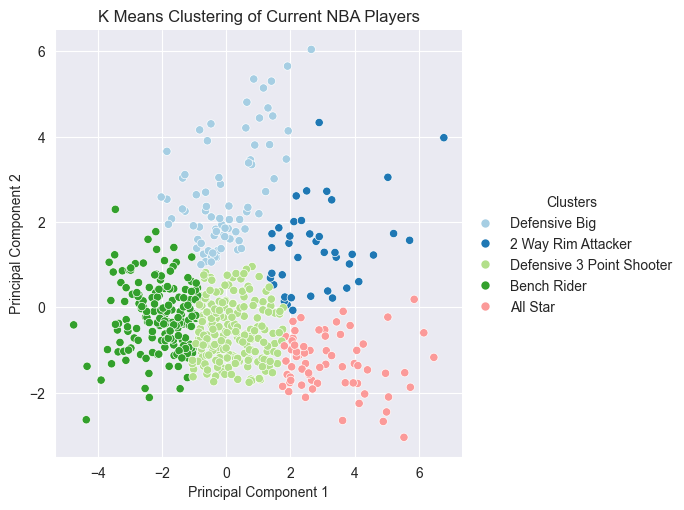

In [141]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.relplot(x= 'Principal Component 1', y= 'Principal Component 2',  data= principal_df, hue = clustered_df['Clusters'])
plt.title('K Means Clustering of Current NBA Players')
plt.show()